### Backtesting raw data (no filtering)

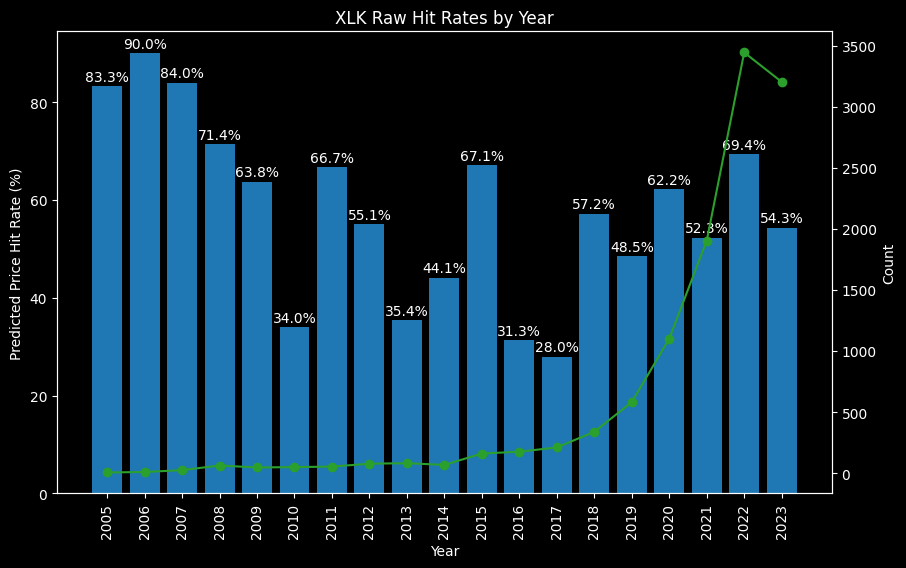

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('raw_xlk_year.csv')
df = df.reset_index(drop=True)
df.head()

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.style.use('dark_background')

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted Price Hit Rate (%)')
bars = ax1.bar(df['year'], df['p1mn'], color=color)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Count')
ax2.plot(df['year'], df['b'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y')

ax1.set_xticks(df['year'])
ax1.set_xticklabels(df['year'], rotation=90, ha='center')

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom', color='white')


plt.title('XLK Raw Hit Rates by Year')
plt.show()

The above graph shows the raw amount of predictions made over each year from 2005 to today. 

The count represents the total number of predictions that have occurred per cross type from 2005-2023 (or for as far back as the instrument has minute data for)

Predicted Price Hit Rate represents whether or not the predicted price was reached within one month of the date that the prediction was made

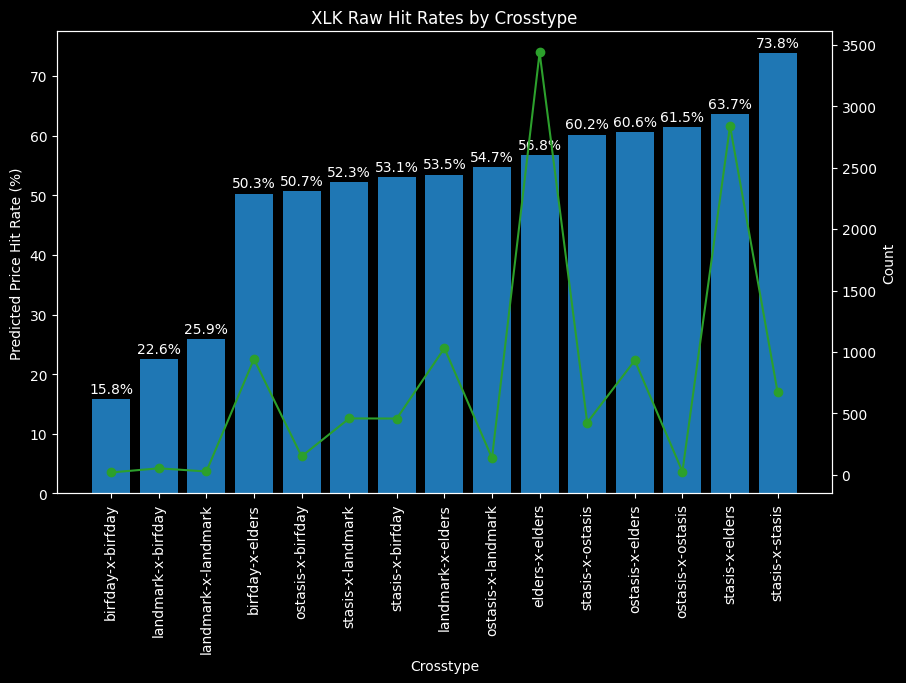

In [80]:
df = pd.read_csv('raw_xlk_crosstypes.csv')
df = df.reset_index(drop=True)
df.head()

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.style.use('dark_background')

color = 'tab:blue'
ax1.set_xlabel('Crosstype')
ax1.set_ylabel('Predicted Price Hit Rate (%)')
bars = ax1.bar(df['crosstypes'], df['p1mn'], color=color)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Count')
ax2.plot(df['crosstypes'], df['b'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y')

ax1.set_xticks(df['crosstypes'])
ax1.set_xticklabels(df['crosstypes'], rotation=90, ha='center')

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom', color='white')


plt.title('XLK Raw Hit Rates by Crosstype')
plt.show()

The above graph shows the types of lines proprietary lines that can cross to create a predicted time and price for an instrument. 

The count represents the total number of predictions that have occurred per cross type from 2005-2023 (or for as far back as the instrument has minute data for)

Predicted Price Hit Rate represents whether or not the predicted price was reached within one month of the date that the prediction was made

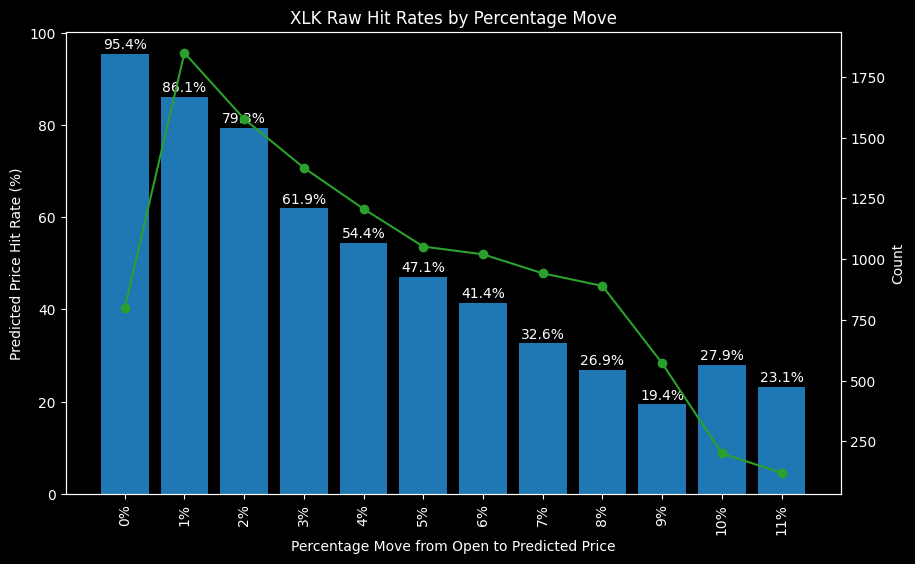

In [81]:
df = pd.read_csv('raw_xlk_pm.csv')
df = df.reset_index(drop=True)
df.head()

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.style.use('dark_background')

color = 'tab:blue'
ax1.set_xlabel('Percentage Move from Open to Predicted Price')
ax1.set_ylabel('Predicted Price Hit Rate (%)')
bars = ax1.bar(df['pm'], df['p1mn'], color=color)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Count')
ax2.plot(df['pm'], df['b'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y')

ax1.set_xticks(df['pm'])
ax1.set_xticklabels(df['pm'], rotation=90, ha='center')

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom', color='white')


plt.title('XLK Raw Hit Rates by Percentage Move')
plt.show()

The above graph shows the percent move from the price of the instrument at the time the prediction is made and the predicted price. Note, the price of the instrument at the time the prediction is made is not found using our proprietary signals, it is simply a close price at a given time. 

The count represents the total number of predictions that have occurred per cross type from 2005-2023 (or for as far back as the instrument has minute data for)

Predicted Price Hit Rate represents whether or not the predicted price was reached within one month of the date that the prediction was made

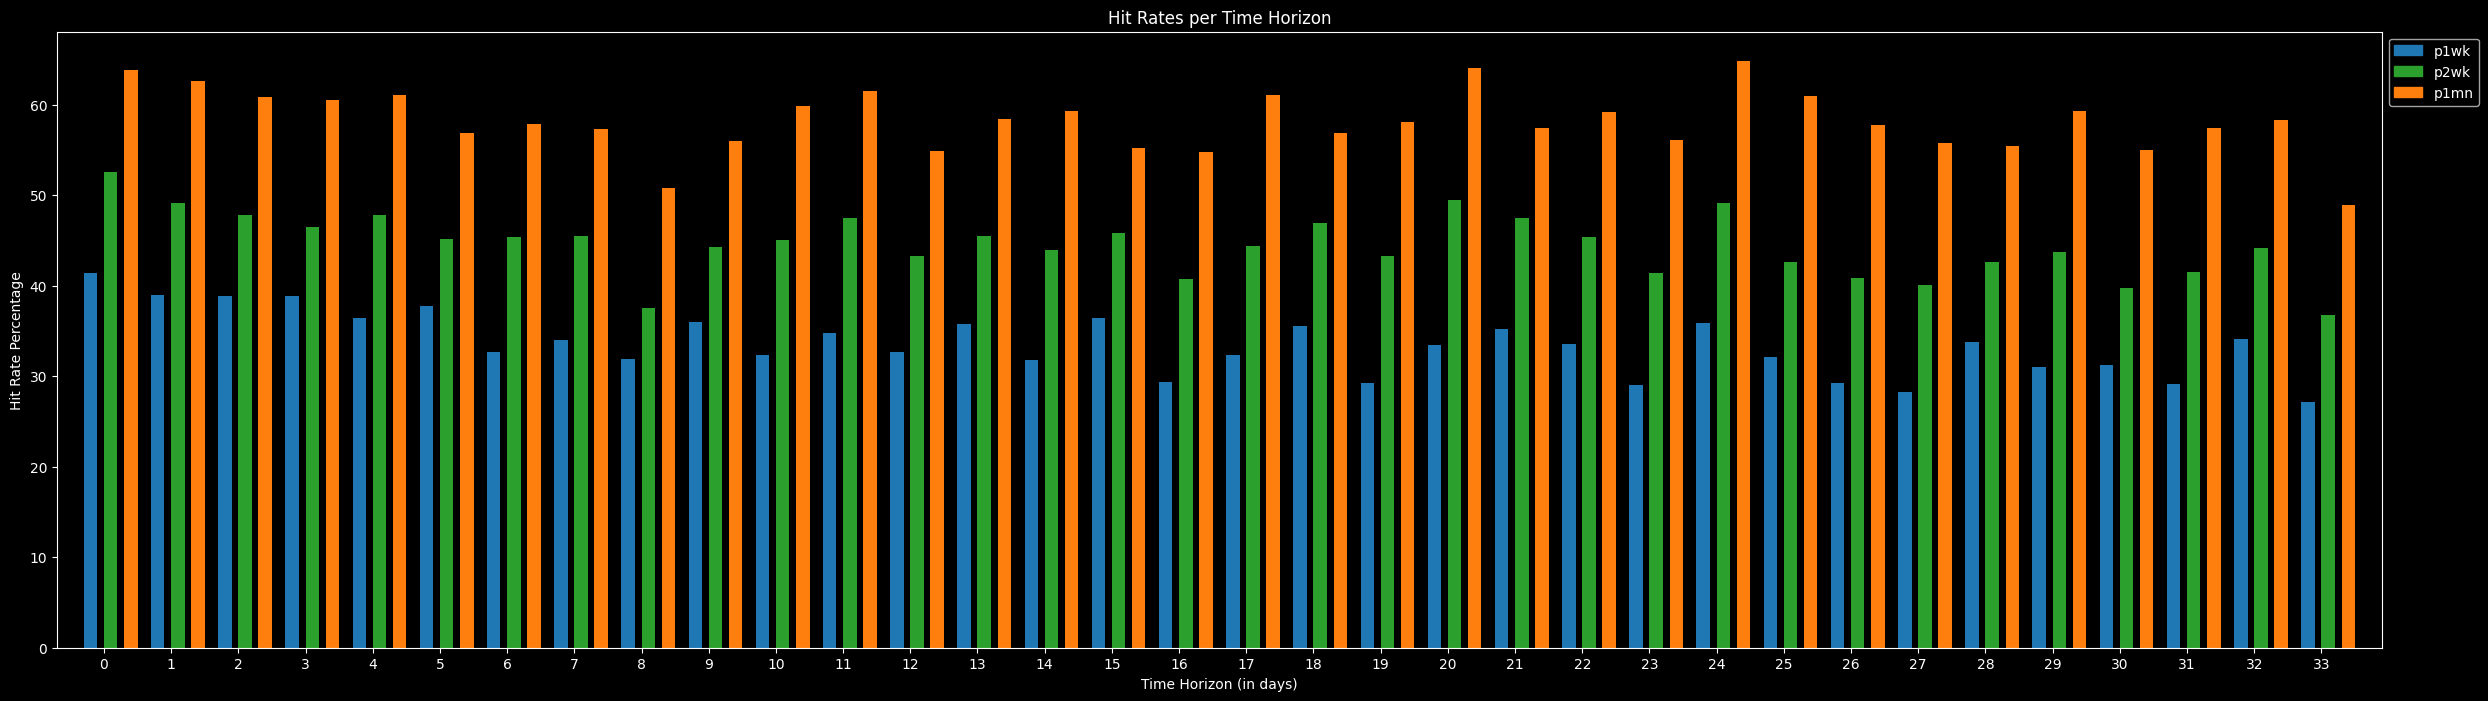

In [82]:
from matplotlib.patches import Patch

df = pd.read_csv('raw_xlk_timehorizon.csv')
df = df.reset_index(drop=True)


plt.style.use('dark_background')


time_differentials = df['timeHorizon'].unique()


percentage_columns = ['p1wk', 'p2wk', 'p1mn']
custom_colors = ['tab:blue', 'tab:green', 'tab:orange']

num_sets = len(percentage_columns)


bar_width = 0.2


fig, ax = plt.subplots(figsize=(30, 8))


colors = plt.cm.Dark2(np.arange(num_sets))


for j, column in enumerate(percentage_columns):
    for i, time_diff in enumerate(time_differentials):
        x_position = i + j * bar_width + 0.1 * j
        bars = ax.bar(x_position, df[df['timeHorizon'] == time_diff][column].values[0], width=bar_width, label=f'{column}', color=custom_colors[j])


ax.set_xlabel('Time Horizon (in days)')
ax.set_ylabel('Hit Rate Percentage')
ax.set_title('Hit Rates per Time Horizon')


ax.set_xlim(-0.5, len(time_differentials) - 0.5 + num_sets * bar_width)


ax.set_xticks(np.arange(len(time_differentials)) + ((num_sets - 1) * bar_width) / 2)
ax.set_xticklabels(time_differentials)


legend_labels = [f'{column}'for column in percentage_columns]
legend_patches = [Patch(color=custom_colors[i]) for i in range(len(percentage_columns))]
ax.legend(legend_patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))



plt.show()

The above graph shows our Time Horizon along the x-axis representing the number of days it is expected to take an instrument to reach the predicted price from the moment we are made aware of the prediction. (ex. x=6 means we expect the price to be reached in 6 days)

The value p1wk represents whether the predicted price was reached within 1 week from the moment we were made aware of the prediction
The value p2wk represents whether the predicted price was reached within 2 weeks from the moment we were made aware of the prediction
The value p1mn represents whether the predicted price was reached within a month from the moment we were made aware of the prediction

Raw values show over 50% of our predictions reach their excepted predicted price within a month of being made aware of the prediction

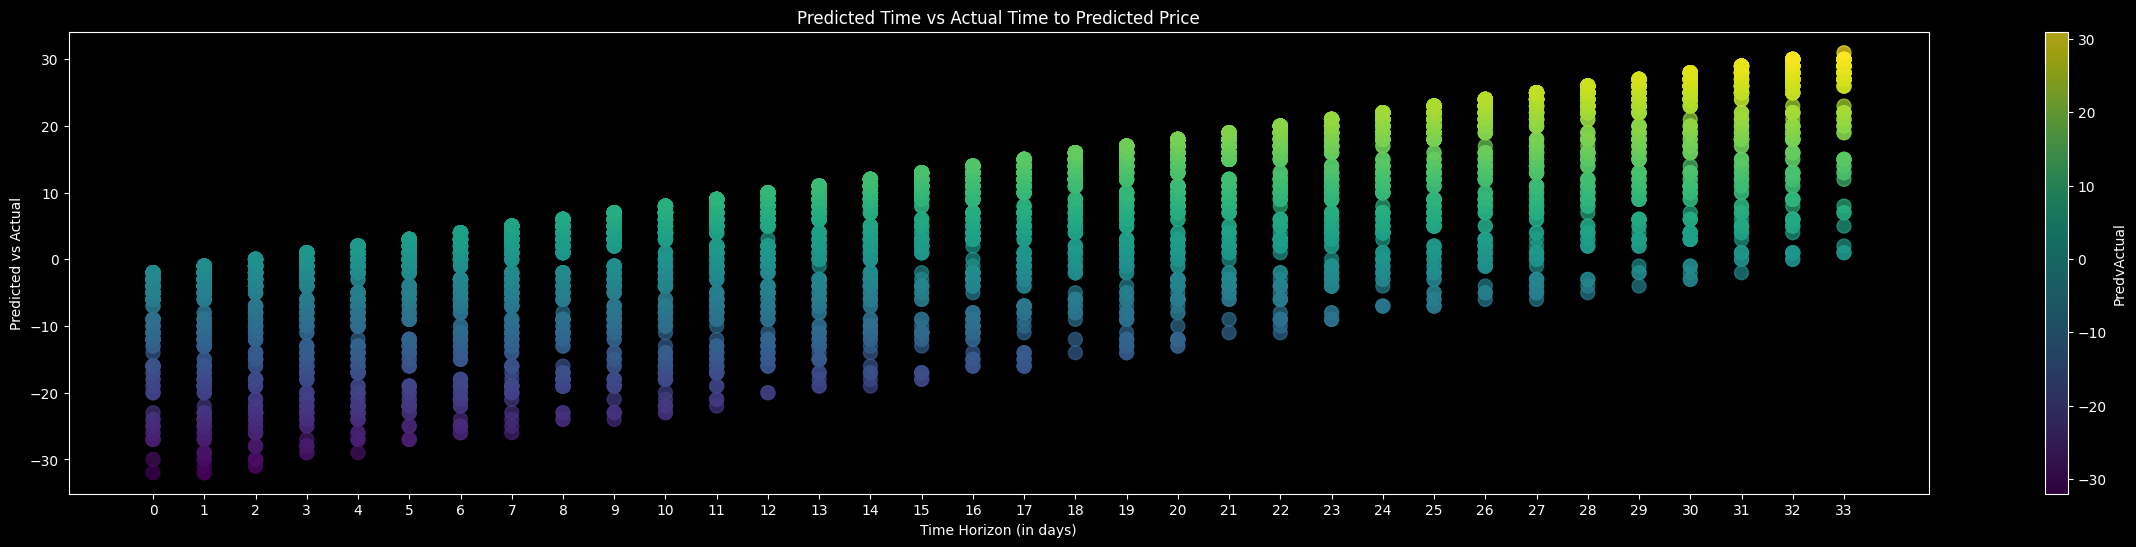

In [83]:
df = pd.read_csv('raw_xlk_bubble_timehorizon.csv')
df = df.reset_index(drop=True)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(30, 6))

scatter = ax.scatter(df['timeHorizon'], df['PredvActual'], s=100, c=df['PredvActual'], cmap='viridis', alpha=0.7)

cbar = plt.colorbar(scatter)
cbar.set_label('PredvActual')

ax.set_xlabel('Time Horizon (in days)')
ax.set_ylabel('Predicted vs Actual')
ax.set_title('Predicted Time vs Actual Time to Predicted Price')

plt.xticks(df['timeHorizon'].unique())

plt.show()


Of the predictions that actually reached their target, we can look at the predicted time horizon vs the actual time it took to reach the target

### Backtesting with odd years of data (2005 - 2023)

In [84]:
#insert a plot showing the based results of odd years hit rate not considering confidence


In [85]:
#insert a plot showing the results of odd years hit rate considering confidence

### Testing on even years of data to validate our confidence and chosen predictions (2005 - 2023)

In [86]:
#insert a plot showing the based results of even years hit rate not considering confidence

In [87]:
#insert a plot showing the based results of even years hit rate considering confidence

### Walk-forward on out of sample data (September - October 2023)

In [88]:
#insert plot showing hit rate with confidence